# Import Library
Import library yang dibutuhkan

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Data Loading

Di sini kita download data dari kaagle menggunakan API dan membacanya


In [43]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mrsimple07/obesity-prediction
!unzip obesity-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction
License(s): apache-2.0
obesity-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  obesity-prediction.zip
replace obesity_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: obesity_data.csv        


In [44]:
df = pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


Mengecek jumlah data

In [45]:
df.shape

(1000, 7)

# EDA (Eksploratory Data Analysis)
Ini adalah proses analisis data yang digunakan untuk memahami struktur, pola, dan karakteristik data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


#### cek informasi statistik

In [47]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


##### Cek nilai yang hilang dan data duplikat

In [48]:
print("Nilai Null :")
print(df.isnull().sum())

Nilai Null :
Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


In [49]:
print(f"Nilai Duplikat:{df.duplicated().sum()}")

Nilai Duplikat:0


#### Mengecek dan menghapus outliers

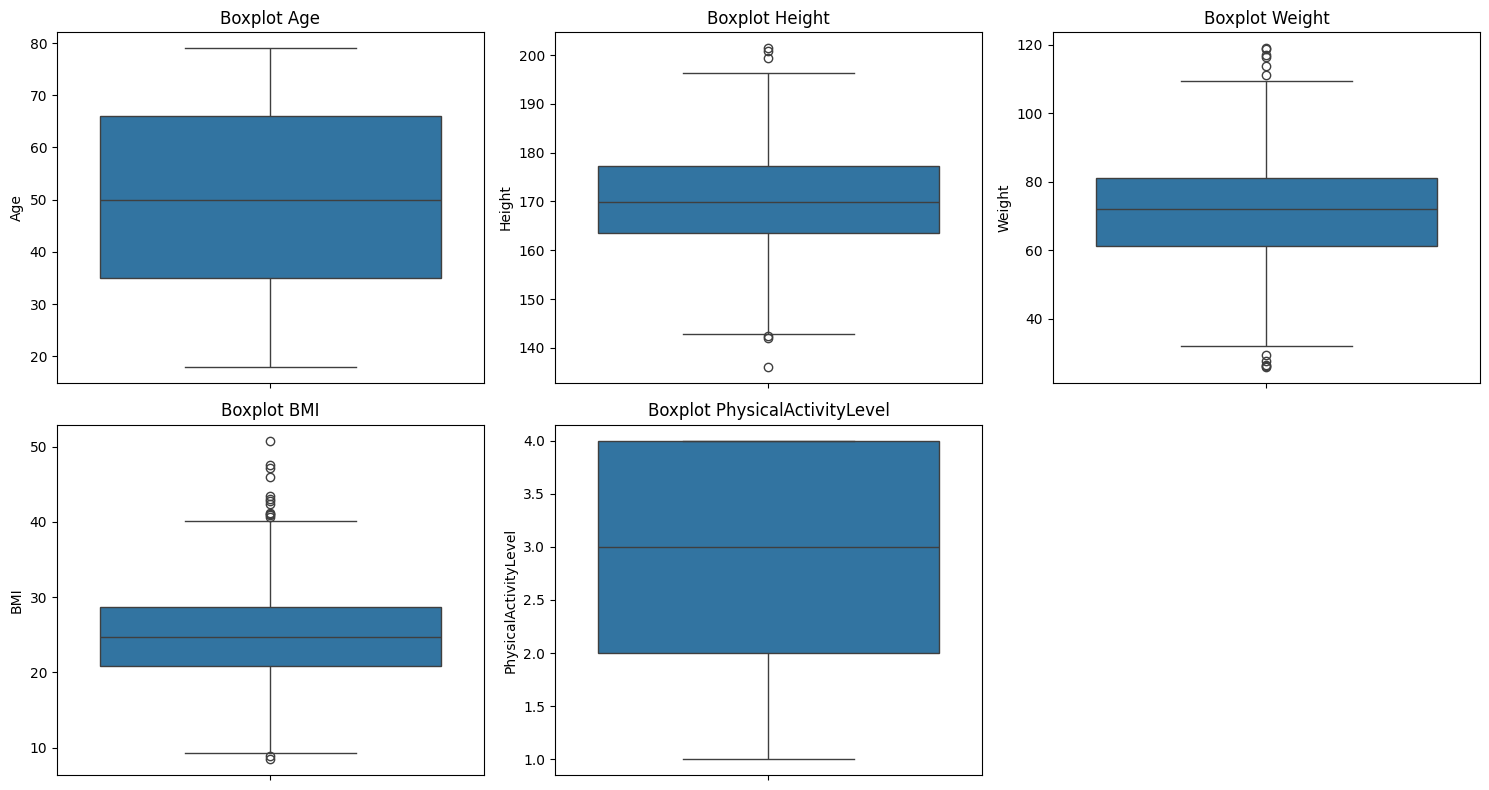

In [50]:
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerik_cols, 1):
    plt.subplot(2, (len(numerik_cols) + 1)//2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [51]:
Q1 = df[numerik_cols].quantile(0.25)
Q3 = df[numerik_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numerik_cols] < (Q1 - 1.5 * IQR)) |
                (df[numerik_cols] > (Q3 + 1.5 * IQR)))

print("Jumlah outlier berdasarkan IQR:")
print(outliers_iqr.sum())

Jumlah outlier berdasarkan IQR:
Age                       0
Height                    6
Weight                   11
BMI                      14
PhysicalActivityLevel     0
dtype: int64


####  Melakukan Univariate Analysis

Mengecek fitur kategorikal dan numerik

In [52]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur numerik:", numerical_features)
print("Fitur kategorikal:", categorical_features)

Fitur numerik: ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
Fitur kategorikal: ['Gender', 'ObesityCategory']


Cateorical Features

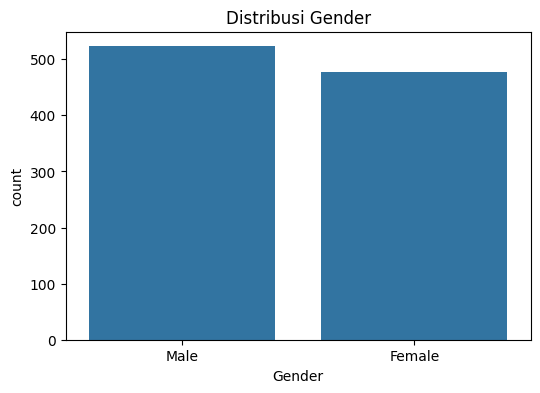

Proporsi Gender (%):
 Gender
Male      52.3
Female    47.7
Name: proportion, dtype: float64


In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Gender')
plt.show()

gender_dist = df['Gender'].value_counts(normalize=True) * 100
print("Proporsi Gender (%):\n", gender_dist.round(2))

<Figure size 1000x600 with 0 Axes>

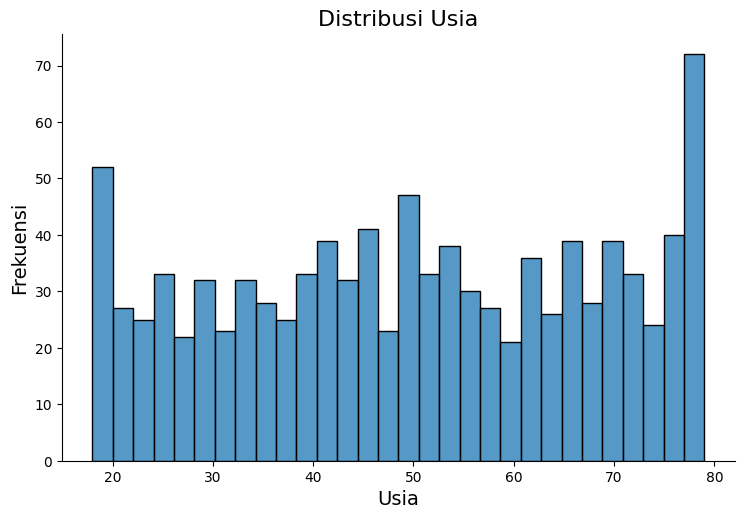

In [54]:
plt.figure(figsize=(10, 6))
sns.displot(df['Age'], bins=30, aspect=1.5)

plt.title("Distribusi Usia", fontsize=16)
plt.xlabel("Usia", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()

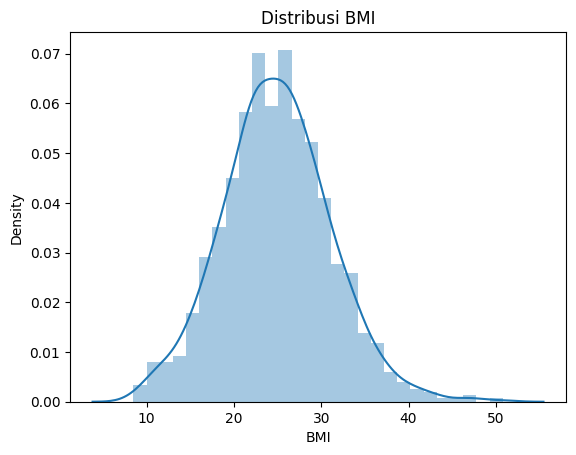

In [55]:
sns.distplot(df['BMI'],rug=False)
plt.title("Distribusi BMI")
plt.show()

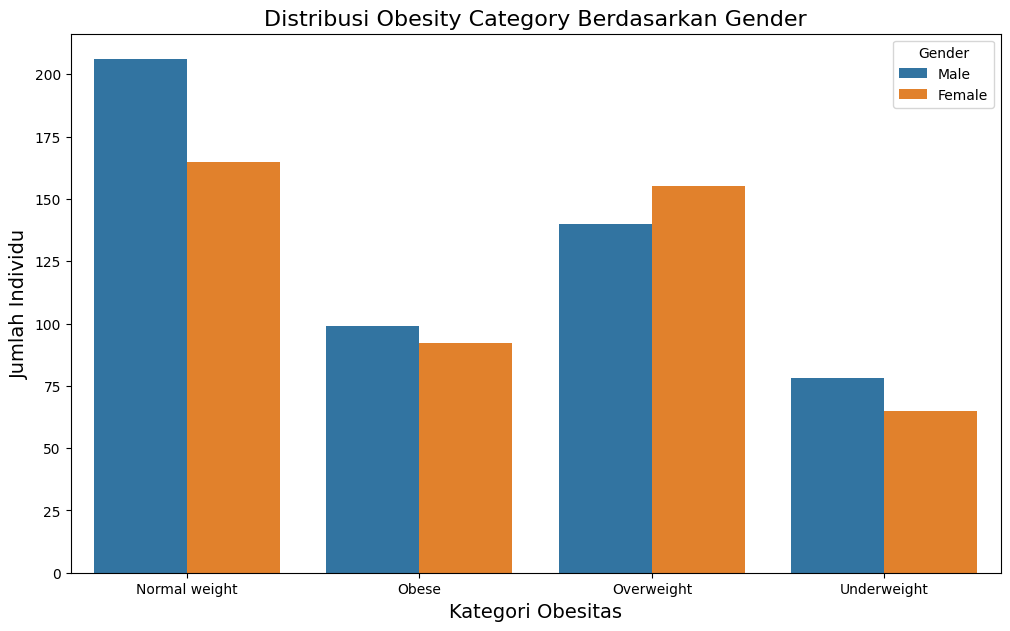

In [56]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='ObesityCategory', hue='Gender')

plt.title("Distribusi Obesity Category Berdasarkan Gender", fontsize=16)
plt.xlabel("Kategori Obesitas", fontsize=14)
plt.ylabel("Jumlah Individu", fontsize=14)

plt.show()

Numerical Features

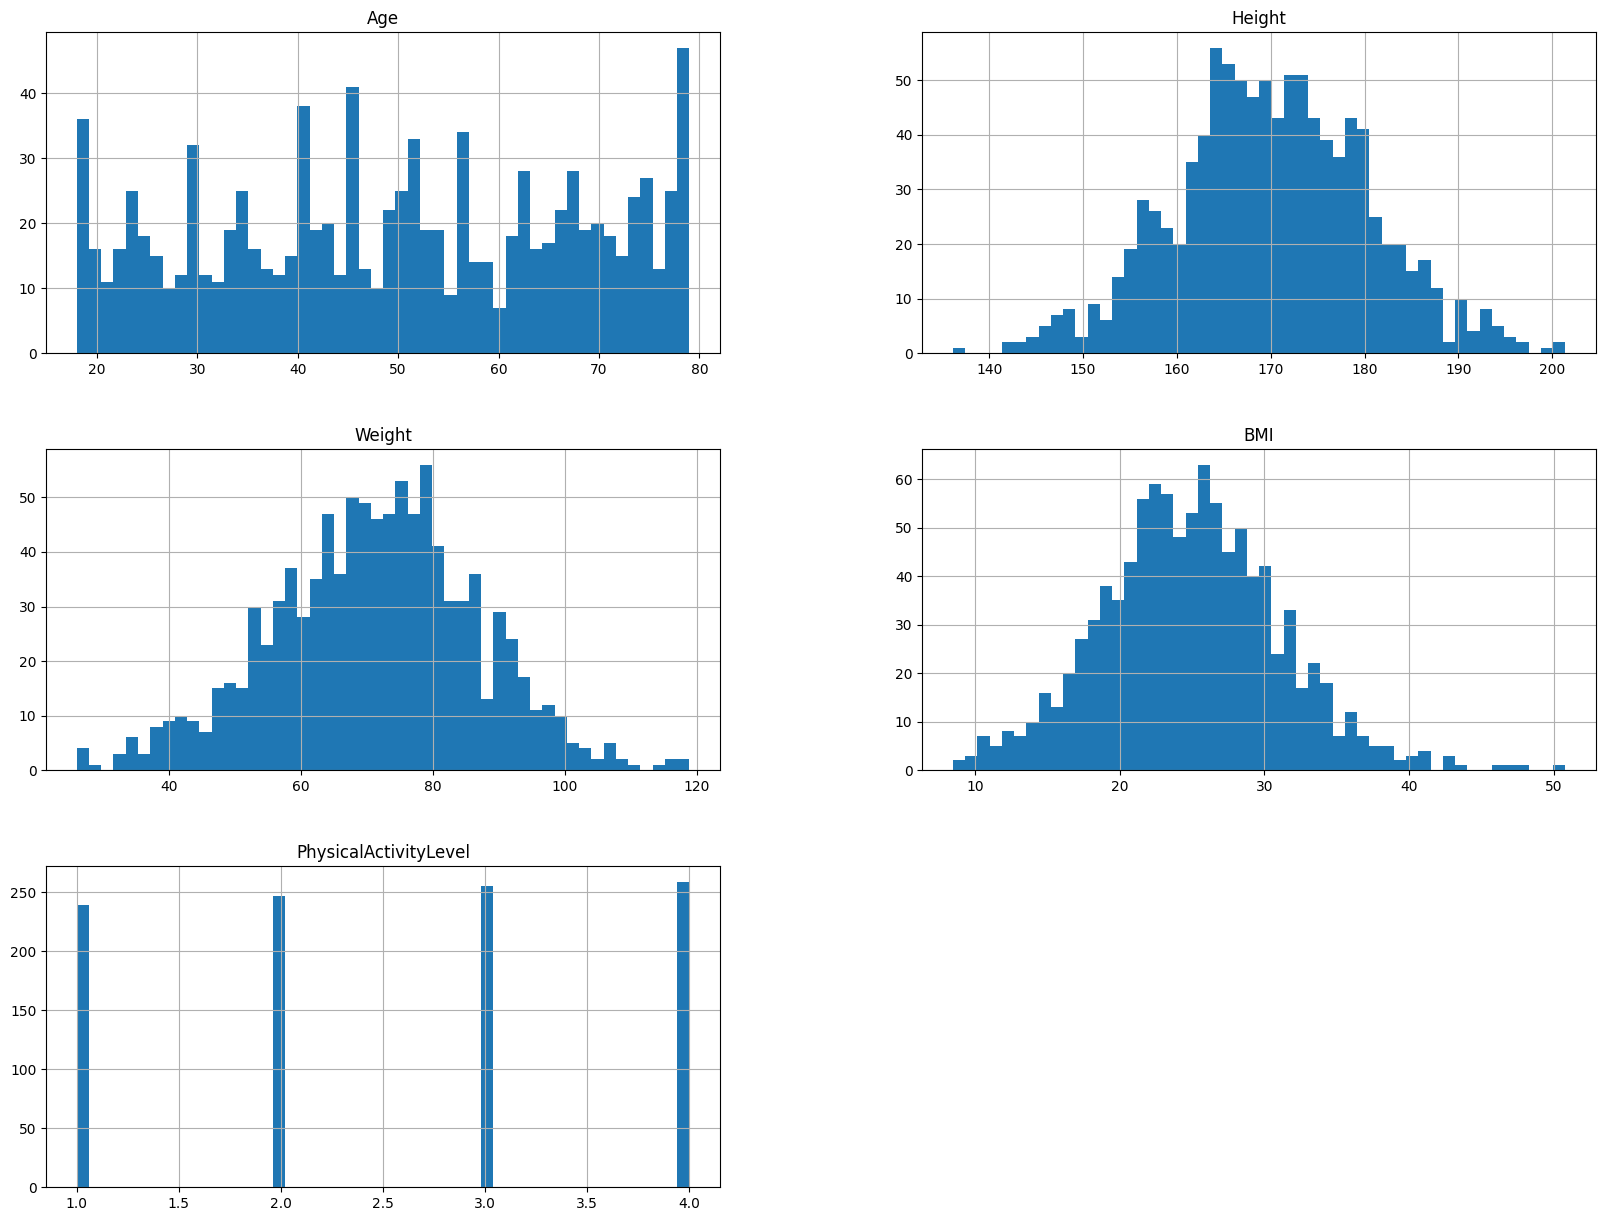

In [57]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Data Preparation

Pada bagian ini, kita akan melakukan empat tahap persiapan data untuk mempersiapkan dataset sebelum digunakan dalam model machine learning. Pertama, kita akan melakukan encoding pada fitur kategori untuk mengubah data kategorikal menjadi format yang dapat dipahami oleh model. Kemudian, kita akan membagi dataset menjadi dua bagian, yaitu data pelatihan dan data pengujian, dengan menggunakan fungsi train_test_split dari library sklearn. Terakhir, kita akan melakukan standarisasi pada data agar semua fitur berada dalam skala yang sama, sehingga model dapat bekerja lebih optimal

#### Penanganan Missing Value dan Duplikat

Pada tahap Exploratory Data Analysis (EDA) sebelumnya, dilakukan pengecekan untuk memastikan tidak ada missing value maupun data duplikat dalam dataset, hasilnya data tidak di temukan missing value ataupun duplikat sehingga kita tidak perlu menangani data missing value ataupun duplikat

#### Handling Outliers

Outliers yang ditemukan dihapus atau disesuaikan nilainya agar tidak mempengaruhi model secara negatif

In [58]:
filter_no_outlier = ~((df[numerik_cols] < (Q1 - 1.5 * IQR)) |
                      (df[numerik_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[filter_no_outlier].reset_index(drop=True)

df_cleaned.shape

(974, 7)

setelah outlier dihapus, data menjadi 974

#### Encoding

In [59]:
gender_encoder = LabelEncoder()
obesity_encoder = LabelEncoder()

df_cleaned['Gender'] = gender_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned['ObesityCategory'] = obesity_encoder.fit_transform(df_cleaned['ObesityCategory'])

print("Mapping ObesityCategory:")
for i, label in enumerate(obesity_encoder.classes_):
    print(f"{i} = {label}")

Mapping ObesityCategory:
0 = Normal weight
1 = Obese
2 = Overweight
3 = Underweight


In [60]:
df_cleaned.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0


In [61]:
df_cleaned.corr()['ObesityCategory']

,ObesityCategory
Age,-0.016670
Gender,-0.043464
Height,0.013018
Weight,-0.141318
BMI,-0.116204
PhysicalActivityLevel,0.010300
ObesityCategory,1.000000


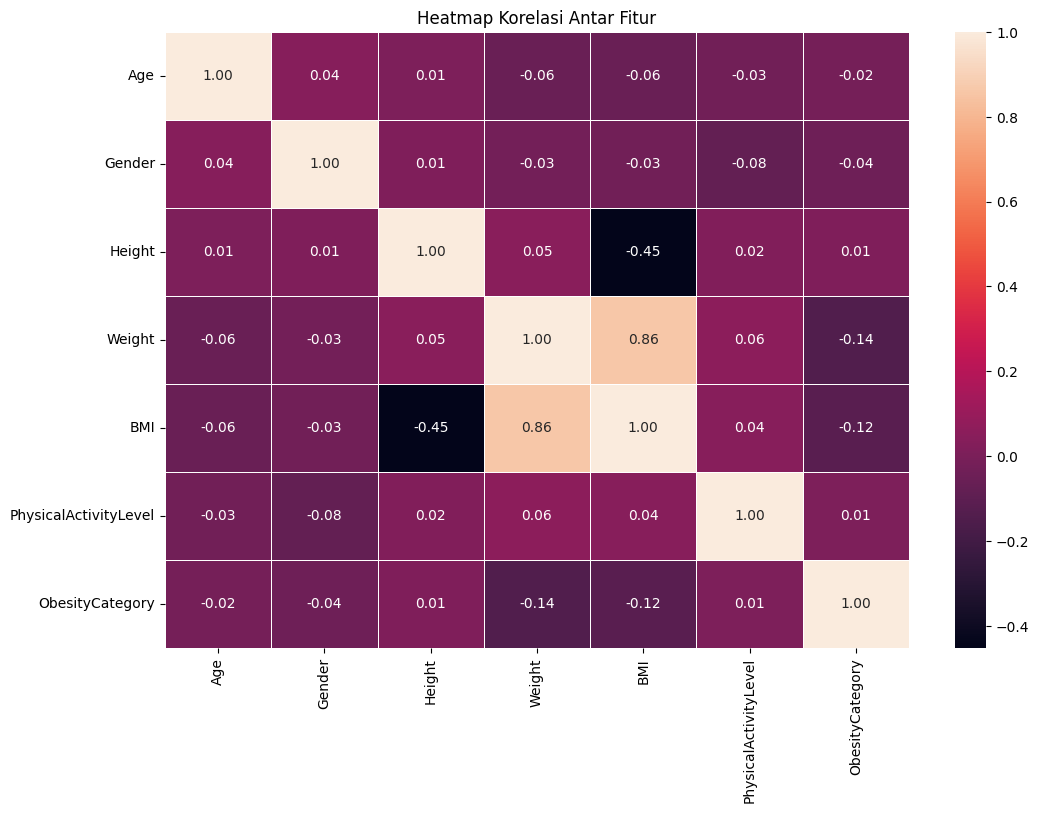

In [62]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

beberapa fitur dengan ObesityCategory memiliki korelasi yang rendah, ini tidak berarti fitur-fitur tersebut tidak penting. Meskipun hubungan antara fitur dan target tampak lemah, fitur tersebut tetap bisa memberikan informasi yang berguna ketika digunakan dalam model prediksi

#### Train-Test-Split

Train-Test Split adalah proses pembagian dataset menjadi dua bagian: satu bagian untuk melatih model (training set) dan satu bagian lainnya untuk menguji kinerja model (testing set). Saya membagi dataset dengan proporsi 80:20, di mana 80% dari data digunakan untuk pelatihan dan 20% sisanya digunakan untuk pengujian

In [63]:
X = df_cleaned.drop(columns='ObesityCategory')
y = df_cleaned['ObesityCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (779, 6)
Shape of X_test: (195, 6)


#### Standarisasi

Standarisasi bertujuan untuk mengubah skala fitur numerik sehingga memiliki distribusi dengan rata-rata 0 dan standar deviasi 1

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development

#### Logistic Regression

Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas kategori biner atau lebih

In [65]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test)

training diatas dilakukan dengan parameter default

#### Random Forest

Random Forest adalah model ensemble yang menggabungkan banyak pohon keputusan (decision trees) untuk membuat prediksi yang lebih kuat dan mengurangi kemungkinan overfitting dibandingkan dengan decision tree

In [66]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

training diatas dilakukan dengan parameter default

#### KNN

K-Nearest Neighbors (KNN) adalah algoritma yang berbasis pada pengukuran jarak antara data baru dan data yang ada. Prediksi untuk kelas baru didasarkan pada mayoritas kelas dari k-tetangga terdekat

In [67]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

training diatas dilakukan dengan parameter 10 tetangga

# Evaluasi Model

Evaluasi Logistic Regression
Accuracy: 96.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       1.00      0.85      0.92        33
           2       0.91      1.00      0.95        61
           3       1.00      0.97      0.98        31

    accuracy                           0.96       195
   macro avg       0.97      0.95      0.96       195
weighted avg       0.97      0.96      0.96       195



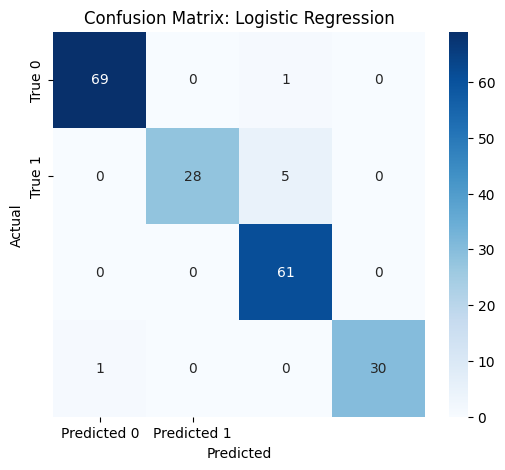



Evaluasi Random Forest
Accuracy: 98.97%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       1.00      1.00      1.00        33
           2       0.98      1.00      0.99        61
           3       1.00      0.97      0.98        31

    accuracy                           0.99       195
   macro avg       0.99      0.99      0.99       195
weighted avg       0.99      0.99      0.99       195



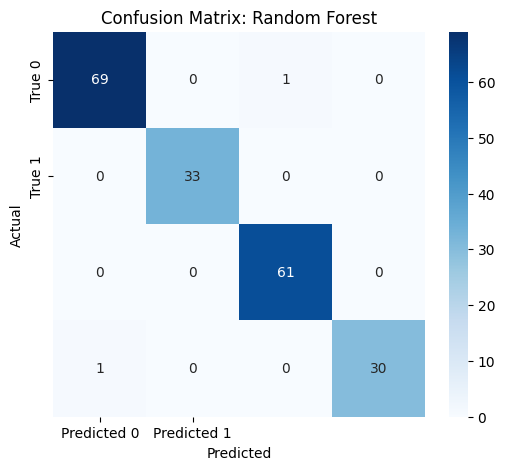



Evaluasi K-Nearest Neighbors
Accuracy: 84.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        70
           1       0.87      0.79      0.83        33
           2       0.84      0.79      0.81        61
           3       1.00      0.74      0.85        31

    accuracy                           0.85       195
   macro avg       0.88      0.82      0.84       195
weighted avg       0.86      0.85      0.84       195



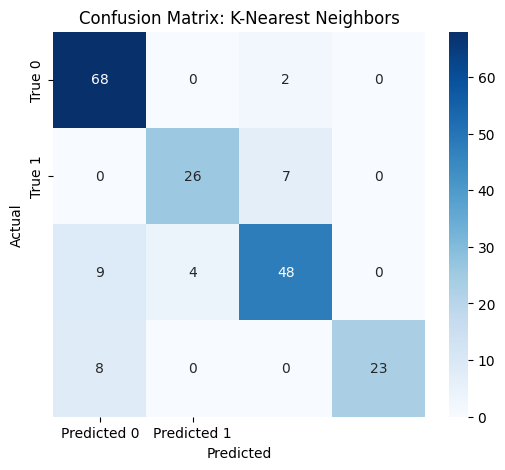

In [68]:
models = {
    'Logistic Regression': model_lr,
    'Random Forest': model_rf,
    'K-Nearest Neighbors': model_knn
}

for model_name, model in models.items():
    print(f"Evaluasi {model_name}")
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\n")

Dalam evaluasi di atas, Random Forest menunjukkan kinerja terbaik dengan akurasi tertinggi, diikuti oleh Logistic Regression yang memiliki performa sangat baik, sementara K-Nearest Neighbors memiliki akurasi yang lebih rendah di banding yang lain